In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("student_habits_performance.csv",index_col=0)


In [3]:
X = df.drop(columns=["exam_score"])
y = df["exam_score"]

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [9]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=25, random_state=42))
])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=25, random_state=42))])

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [14]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

mae,mse,r2

(7.601, 88.186, 0.6560998678558692)

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "regressor__max_depth": list(range(1, 25)),
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(
    model,                # Burada Pipeline'ı veriyoruz
    param_grid=param_grid, # Burada düzeltilmiş parametreler
    scoring="r2",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'study_hours_per_day',
                                                                          'social_media_hours',
                                                                          'netflix_hours',
                                                                          'attendance_percentage',
                                                                          'sleep_hours',
                                                                          'exercise_frequency',
                                                                          'mental_health_rating']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'part_time_job',
                                                                          'diet_quality',
                                                                          'parental_education_level',
                                                                          'internet_quality',
                                                                          'extracurricular_participation'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(max_depth=25,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10]},
             scoring='r2')

In [17]:
grid.best_estimator_,grid.best_score_,grid.best_params_

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['age', 'study_hours_per_day',
                                                    'social_media_hours',
                                                    'netflix_hours',
                                                    'attendance_percentage',
                                                    'sleep_hours',
                                                    'exercise_frequency',
                                                    'mental_health_rating']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['gender', 'part_time_job',
                                                    'diet_quality',
                                                    'parental_education_l

In [18]:

results = pd.DataFrame({
    'Gerçek Sınav Puanı': y_test.values,
    'Tahmin Edilen Sınav Puanı': y_pred
})


results.head(10)

,Gerçek Sınav Puanı,Tahmin Edilen Sınav Puanı
0,64.2,70.7
1,72.7,94.8
2,79.0,74.6
3,79.5,74.5
4,58.2,67.9
5,53.4,59.0
6,70.8,65.4
7,62.5,71.9
8,36.8,34.3
9,67.6,75.4


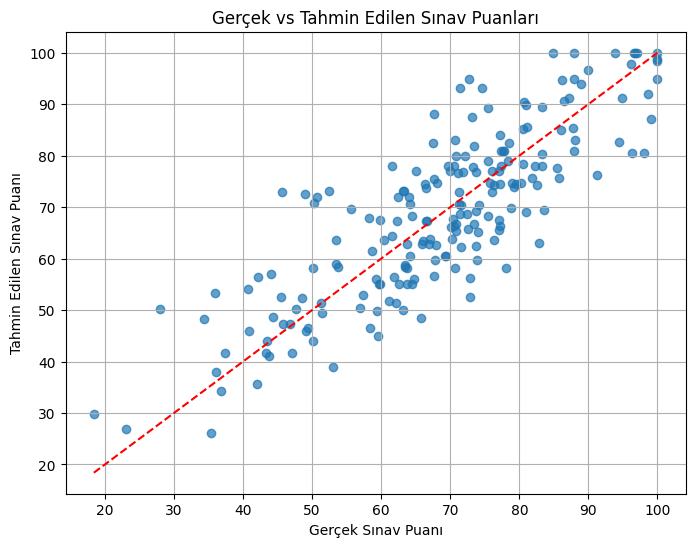

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Gerçek Sınav Puanı')
plt.ylabel('Tahmin Edilen Sınav Puanı')
plt.title('Gerçek vs Tahmin Edilen Sınav Puanları')
plt.grid(True)
plt.show()